# Sales Analysis and Game Success Prediction at Ice Online Store

# Content

1. Introduction
2. Data Initialization
3. Data Processing
    
    3.1 Renaming Columns
    
    3.2 Converting Data Types
    
    3.3 Handling Missing Values
    
    3.4 Calculating Total Sales

4. Data Analysis
5. User Profiling for Each Region
6. Hypothesis Testing
7. General Conclusion

# Introduction
Ice Online Store is a retailer that sells video games from around the world. There is data related to user and expert game reviews, genres, platforms, and historical game sales data available from open sources.

# Purposes
1. Identify patterns that determine whether a game succeeds or not.
2. Find the most potential games and plan the next advertising campaign.

# Steps
There is data available for the year 2016, and we will plan a campaign for the year 2017. The `dataset /datasets/games.csv` contains ESRB, an independent regulatory organization that evaluates game content and provides age ratings for teenagers or adults. The steps taken from the file path are:

1. Preparing the data, then converting the data into the required data types, and then identifying and eliminating data errors.
2. Analyzing the data, identifying potential games, and visualizing them.
3. Conducting user profiling for each region.
4. Testing hypotheses.
5. General conclusion.

# Initialization

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from datetime import datetime, timedelta
from scipy import stats as st

# Data

In [93]:
# Muat file data ke dalam DataFrame
df = pd.read_csv('/datasets/games.csv')

# Data Preparation

In [94]:
# mengganti nama kolom
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [95]:
# mengubah nama kolom menjadi lower letter
df = df.rename(columns={'Name': 'name',
                        'Platform': 'platform',
                        'Year_of_Release': 'year_of_release',
                        'Genre': 'genre',
                        'NA_sales': 'na_sales',
                        'EU_sales': 'eu_sales',
                        'JP_sales': 'jp_sales',
                        'Other_sales': 'other_sales',
                        'Critic_Score': 'critic_score',
                        'User_Score': 'user_score',
                        'Rating': 'rating'
})

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [96]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3454,NBA 2K7,X360,2006.0,Sports,0.53,0.00,0.00,0.04,84.0,7.8,E
11168,Terraria,3DS,2016.0,Action,0.00,0.04,0.05,0.00,71.0,7.1,T
563,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,NaN
15149,Mage Knight: Destiny's Soldier,DS,2006.0,Strategy,0.02,0.00,0.00,0.00,59.0,7.1,E10+
8843,Spongebob Squarepants / Fairly Odd Parents Dou...,GBA,2005.0,Action,0.11,0.04,0.00,0.00,NaN,NaN,NaN
3725,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,Fighting,0.39,0.10,0.01,0.04,55.0,5.8,T
15753,Still Life 2,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,67.0,5.7,M
8668,Bomberman Land Touch! 2,DS,2007.0,Puzzle,0.13,0.00,0.01,0.01,NaN,NaN,NaN
11459,Little League World Series Baseball 2010,PS3,2010.0,Sports,0.07,0.00,0.00,0.01,61.0,tbd,E
12966,Touch 'N' Play Collection,DS,2010.0,Misc,0.03,0.01,0.00,0.00,NaN,tbd,E


In [97]:
# check nilai yang hilang
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


In [98]:
# mengonversikan tipe data ke tipe data yang dibutuhkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


From the data types above,

* for numerical columns, they are already in numerical data type, some adjustments include:
    * `year_of_release` to be int
    * `user_score` needs to be cleaned first due to containing TBD, then converted to float type
    * the `rating` column needs to be considered as a category type, as it represents game ratings.
* the total rows are 16715, there are missing values in the columns name, `year_of_release`, `genre`, `critic_score`, `user_score`, and `rating`.

In [99]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [100]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

In [101]:
# nilai yang hilang di year_of_release diganti dengan nilai random
start_date = datetime(1970, 1, 1)
end_date = datetime(2016, 12, 31)
date_range = [start_date + timedelta(days = random.randint(0, (end_date - start_date).days)) for _ in range(len(df))]

df['year_of_release'].fillna(pd.Series(date_range), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [102]:
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11794,Animal Kingdom: Wildlife Expedition,Wii,2009,Adventure,0.07,0.0,0.0,0.01,NaN,tbd,E


In [103]:
# check nilai hilang pada user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [104]:
# check nilai hilang pada critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [105]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,1974.193599,0.263377,0.145060,0.077617,0.047342,68.967679
std,252.559930,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [106]:
# mengganti tbd dengan NaN di user_score
df['user_score'].replace('tbd', np.nan, inplace=True)

# mengganti tipe data menjadi float
df['user_score'] = df['user_score'].astype(float)


In [107]:
# check rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [108]:
# NaN pada rating diganti dengan 'Not Rated'
df['rating'].fillna('Not Rated', inplace=True)

In [109]:
# check genre
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [110]:
# mengganti nilai hilang pada genre dengan unknown
df['genre'].fillna('unknown', inplace=True)

In [111]:
# mengganti nilai hilang pada name dengan unknown
df['name'].fillna('unknown', inplace=True)

In [112]:
# check kembali nilai yang hilang
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
user_score,9125,0.55
critic_score,8578,0.51
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00


In [113]:
# hitung total penjualan (di setiap wilayah) untuk setiap game
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [114]:
# check kembali tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [115]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5728,Bust-A-Move Universe,3DS,2011,Puzzle,0.08,0.15,0.06,0.03,49.0,4.8,E,0.32
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
14393,Pachinko Kamen Rider: Shocker Zenmetsu Daisakusen,PS2,2008,Misc,0.00,0.00,0.03,0.00,NaN,NaN,Not Rated,0.03
11502,Knife Edge: NoseGunner,N64,1998,Shooter,0.06,0.02,0.00,0.00,NaN,NaN,Not Rated,0.08
9301,ESPN MLB Baseball,XB,2004,Sports,0.10,0.03,0.00,0.00,NaN,NaN,Not Rated,0.13


* Data types have been converted to the required types.
* Missing values in:
    * `name` and `genre` are changed to unknown, as the amount missing is minimal and numerical values are not suitable.
    * `year_of_release` is filled with random values.
    * `critic_score` and `user_score` are filled with the mean value due to the moderate data spread.
    * `rating` is filled with not rated.

# Data Analysis

# The number of games released in different years.

In [116]:
# menghapus tahun rilis 0
df = df[df['year_of_release'] != 0]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not Rated,0.01


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

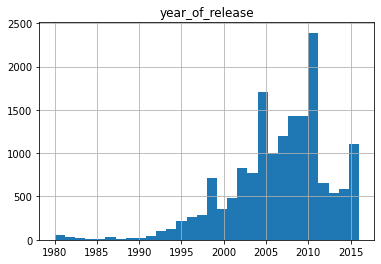

In [117]:
df.hist('year_of_release', bins=30)

From the dataset of yearly releases, it can be observed that there were many games released throughout the years from 1980 to 2015, with the peak number of releases occurring in 2010.

# Sales variation differs from one platform to another.

In [118]:
# Mengelompokkan data berdasarkan platform dan menghitung total penjualan dan menemukan platform terbesar
platform_sales = pd.pivot_table(df, values='total_sales', index='platform', aggfunc='sum')
platform_sales['% of total'] = (platform_sales['total_sales'] / df.shape[0]).round(2)
platform_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales,% of total
platform,,
PS2,1233.56,0.08
X360,961.24,0.06
PS3,931.34,0.06
Wii,891.18,0.05
DS,802.78,0.05
PS,727.58,0.04
PS4,314.14,0.02
GBA,312.88,0.02
PSP,289.53,0.02


<Figure size 4320x4320 with 0 Axes>

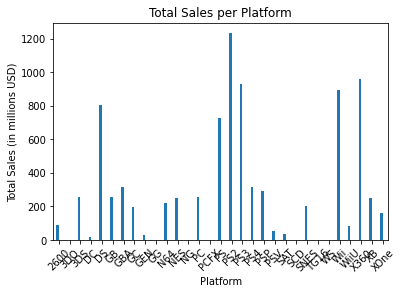

In [119]:
plt.figure(figsize=(60, 60))
platform_sales.plot(kind='bar', legend=None)
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions USD)')
plt.xticks(rotation=45)
plt.show()

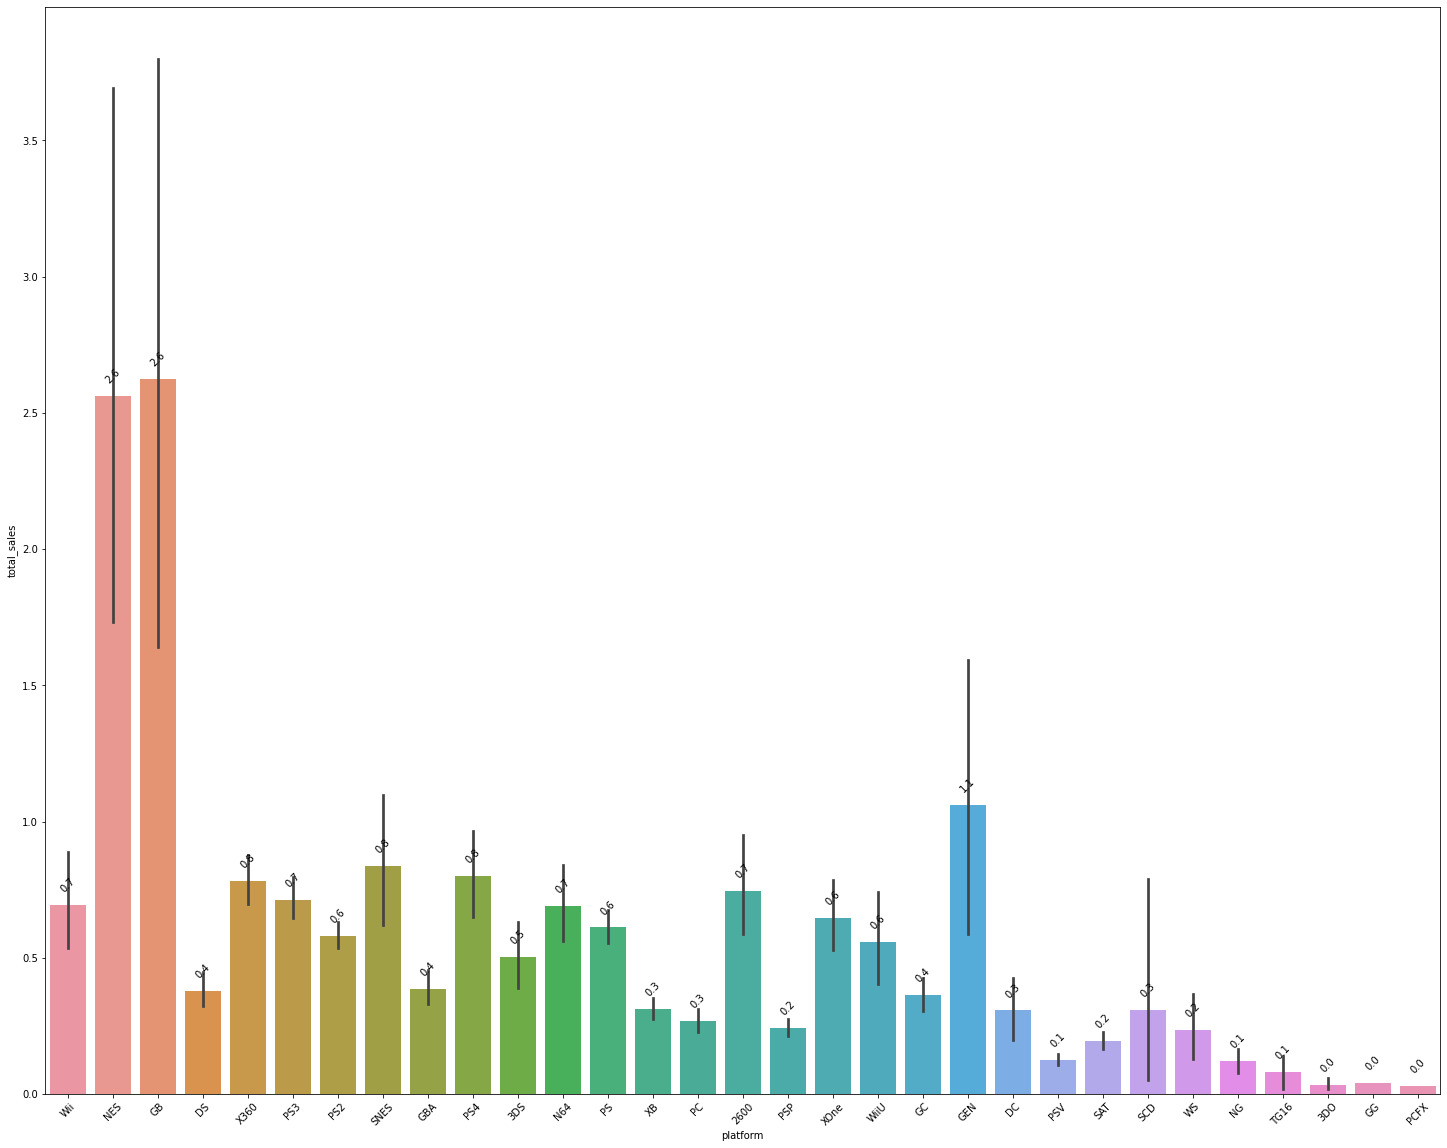

In [120]:
plt.figure(figsize=(25,20)) # contoh kode saya perbesar figure size nya
splot = sns.barplot(data=df, x='platform', y='total_sales') # assign plot kedalam object
#contoh kode anotasi mulai
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

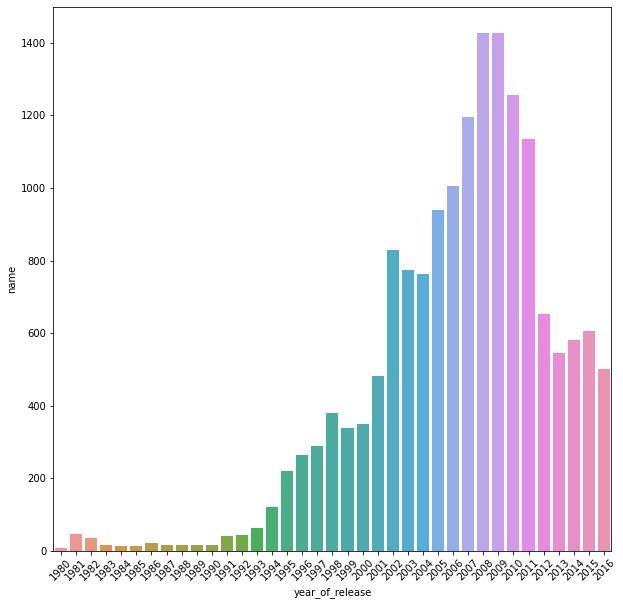

In [121]:
game_per_year = df.groupby('year_of_release')['name'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=game_per_year, x='year_of_release', y='name')
plt.xticks(rotation=45)

It's found that the highest platform is PS2, with the highest sales occurring in 2008 and 2009.

# Determining the time period for data collection.
Annual sales through the top 3 platforms, namely: PS2, X360, and PS3.

In [122]:
def sales_per_platform (data, platform):
    df_new = data[data['platform'] == platform]
    df_new.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')

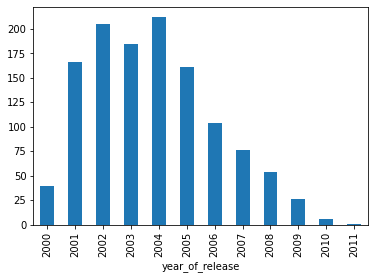

In [123]:
sales_per_platform(df, 'PS2')

In [124]:
PS2_sales_by_year = df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum().reset_index()
PS2_sales_by_year

,year_of_release,total_sales
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


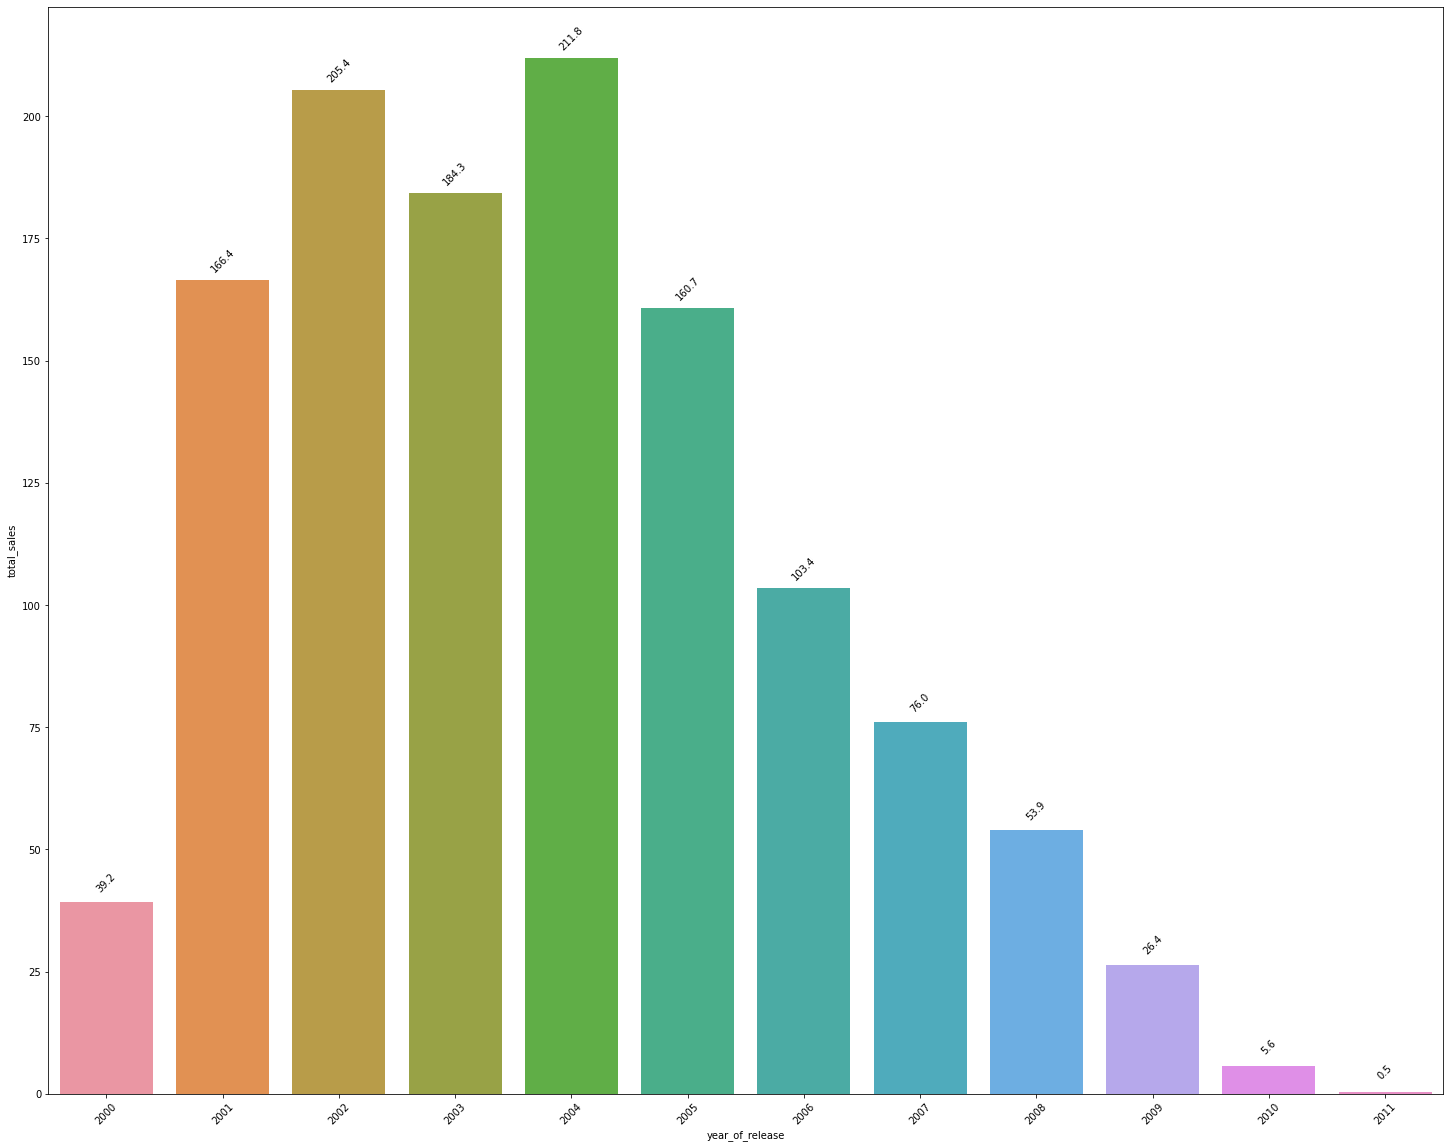

In [125]:
plt.figure(figsize=(25,20)) # contoh kode saya perbesar figure size nya
splot = sns.barplot(data=PS2_sales_by_year, x='year_of_release', y='total_sales') # assign plot kedalam object
#contoh kode anotasi mulai
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

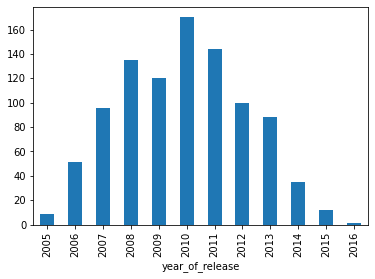

In [126]:
sales_per_platform(df, 'X360')

In [127]:
X360_sales_by_year = df[df['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum().reset_index()
X360_sales_by_year

,year_of_release,total_sales
0,2005,8.25
1,2006,51.62
2,2007,95.41
3,2008,135.26
4,2009,120.29
5,2010,170.03
6,2011,143.84
7,2012,99.74
8,2013,88.58
9,2014,34.74


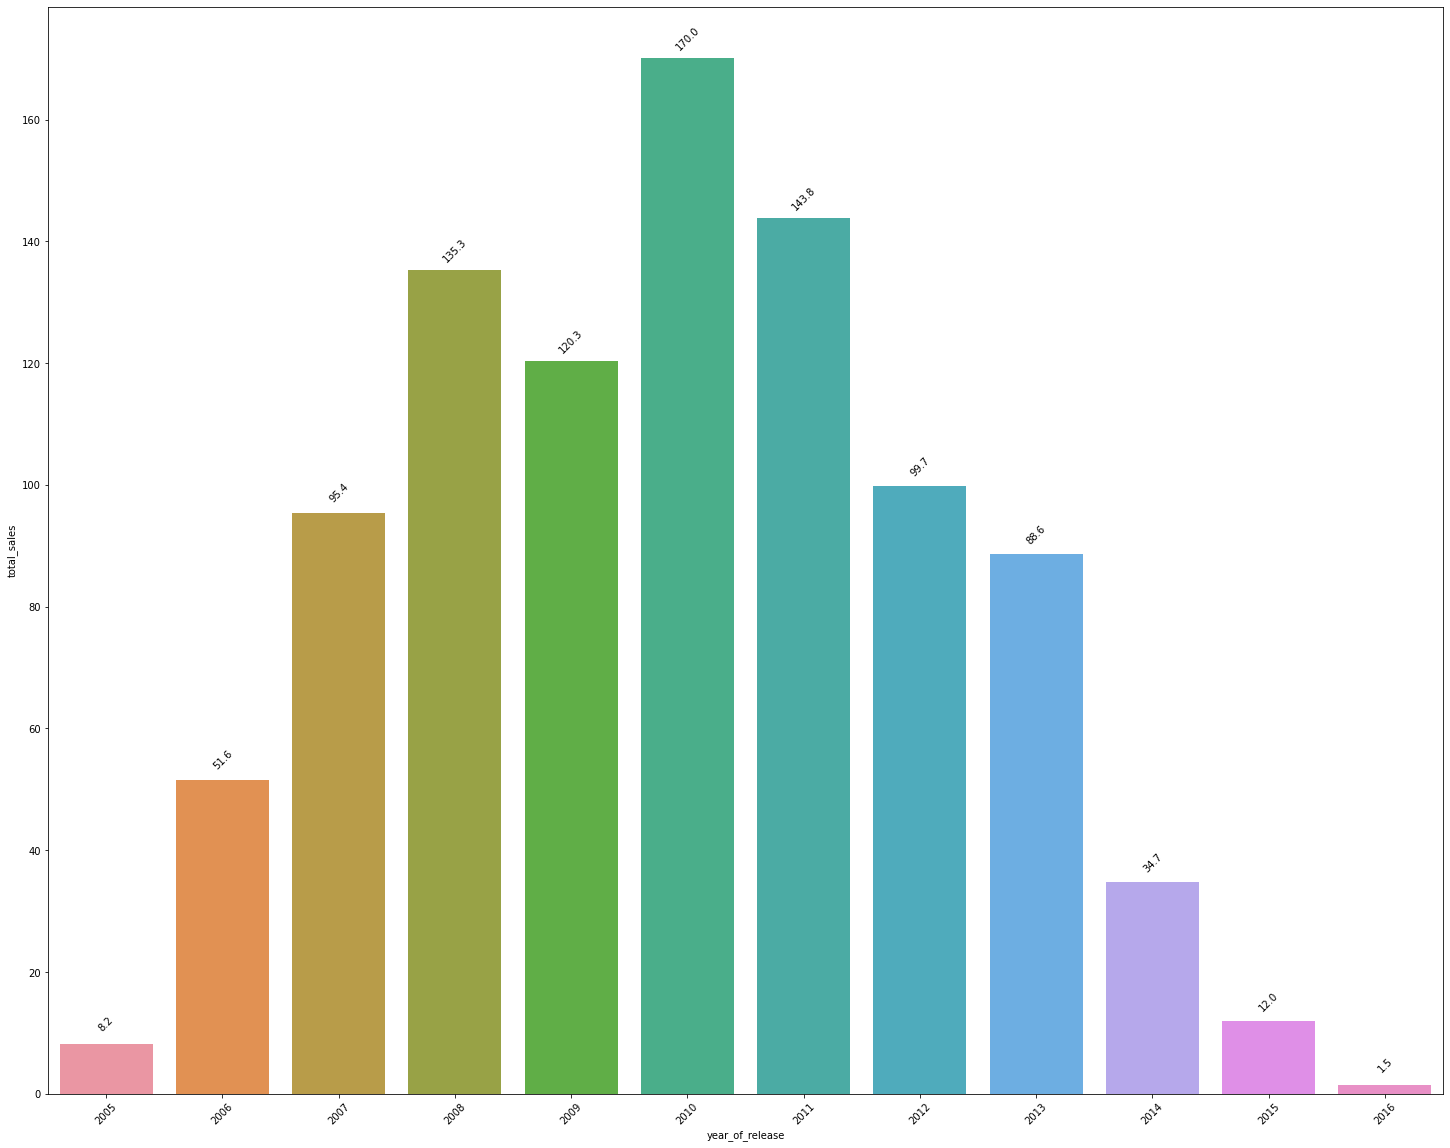

In [128]:
plt.figure(figsize=(25,20)) # contoh kode saya perbesar figure size nya
splot = sns.barplot(data=X360_sales_by_year, x='year_of_release', y='total_sales') # assign plot kedalam object
#contoh kode anotasi mulai
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

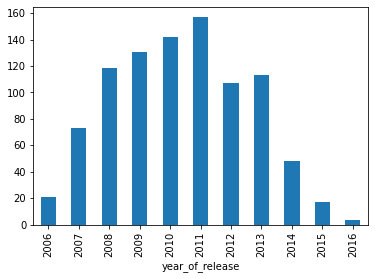

In [129]:
sales_per_platform(df, 'PS3')

In [130]:
PS3_sales_by_year = df[df['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum().reset_index()
PS3_sales_by_year

,year_of_release,total_sales
0,2006,20.96
1,2007,73.19
2,2008,118.52
3,2009,130.93
4,2010,142.17
5,2011,156.78
6,2012,107.36
7,2013,113.25
8,2014,47.76
9,2015,16.82


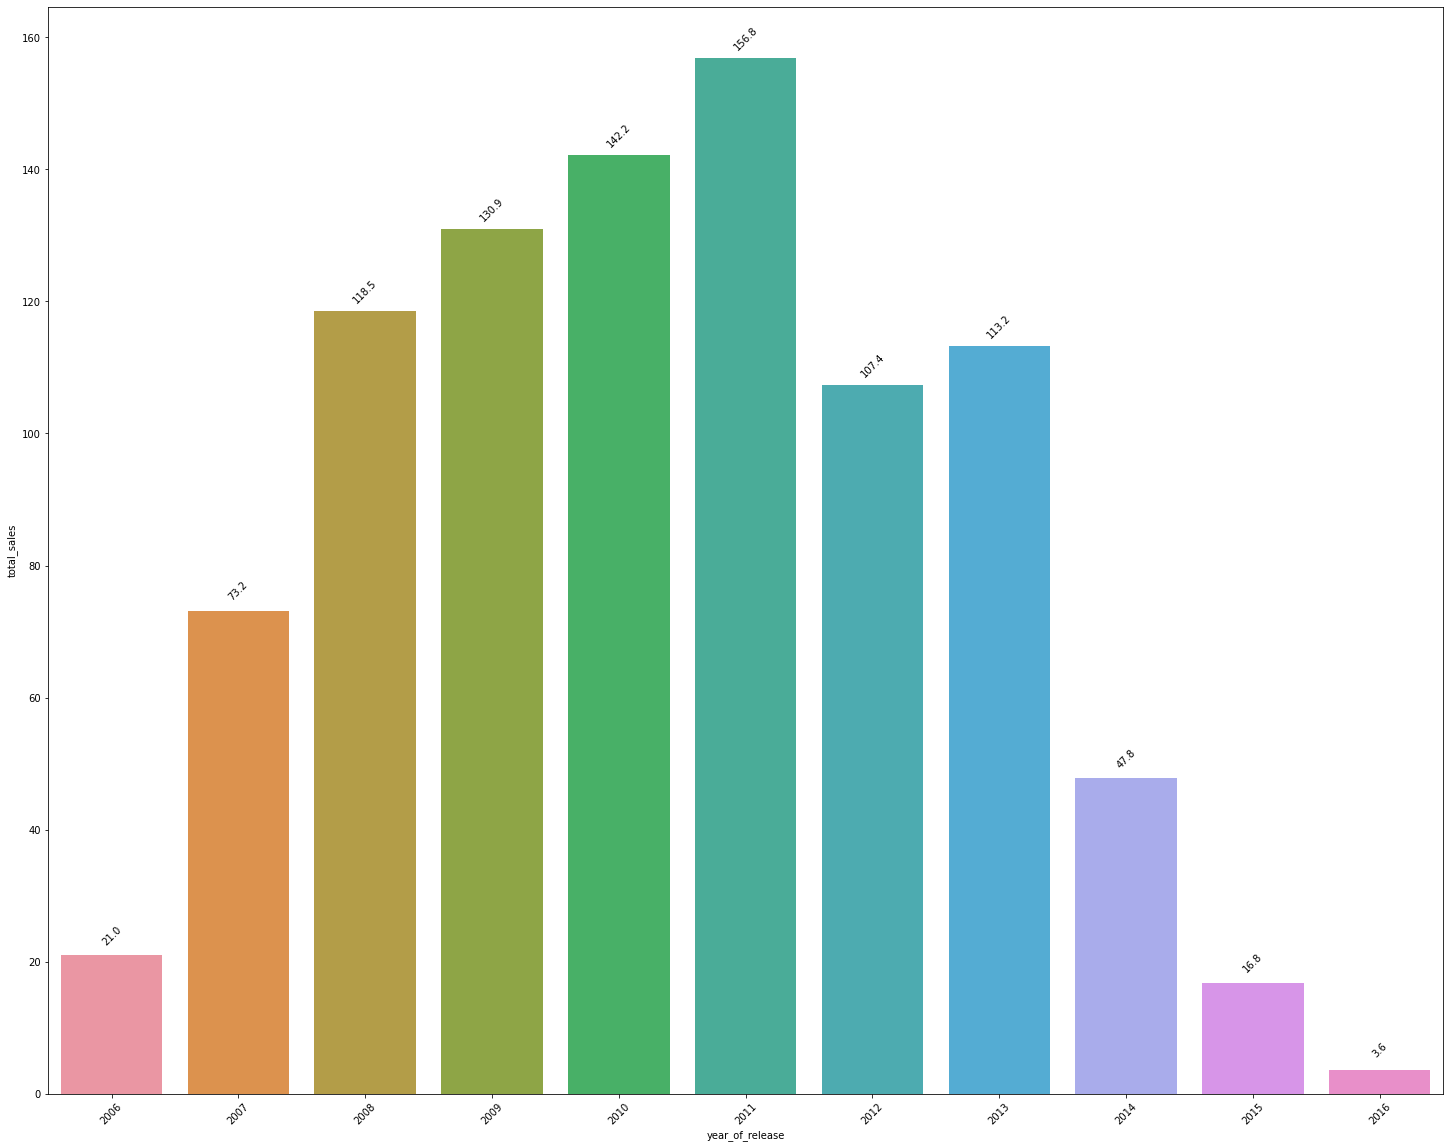

In [131]:
plt.figure(figsize=(25,20)) # contoh kode saya perbesar figure size nya
splot = sns.barplot(data=PS3_sales_by_year, x='year_of_release', y='total_sales') # assign plot kedalam object
#contoh kode anotasi mulai
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

Based on the three largest platforms:

* On average, it tends to require a 5-year popularity period.
* PS2 achieved its highest sales in 2004.
* X360 recorded its highest sales in 2010.
* PS3 reached its highest sales in 2011.

# Using the relevant data,
From the trends of the top 3 platforms above, the years to be used for prediction in 2017 are the last 5 years of data, thus the selected data starts from the year 2012.

In [132]:
df_final = df[df['year_of_release']>=2012]
df_final.shape

(2886, 12)

Next, using the df_final with a total of 2886 rows.

# Platform with the highest sales volume¶
In addition to identifying the platform with the highest sales, it is also important to identify platforms that are growing and declining, and then select platforms with the potential to generate profit.

<AxesSubplot:xlabel='platform'>

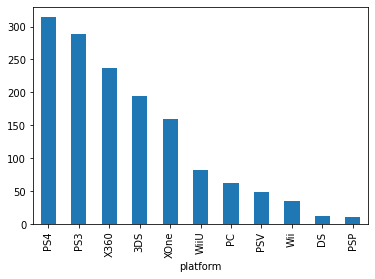

In [133]:
df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

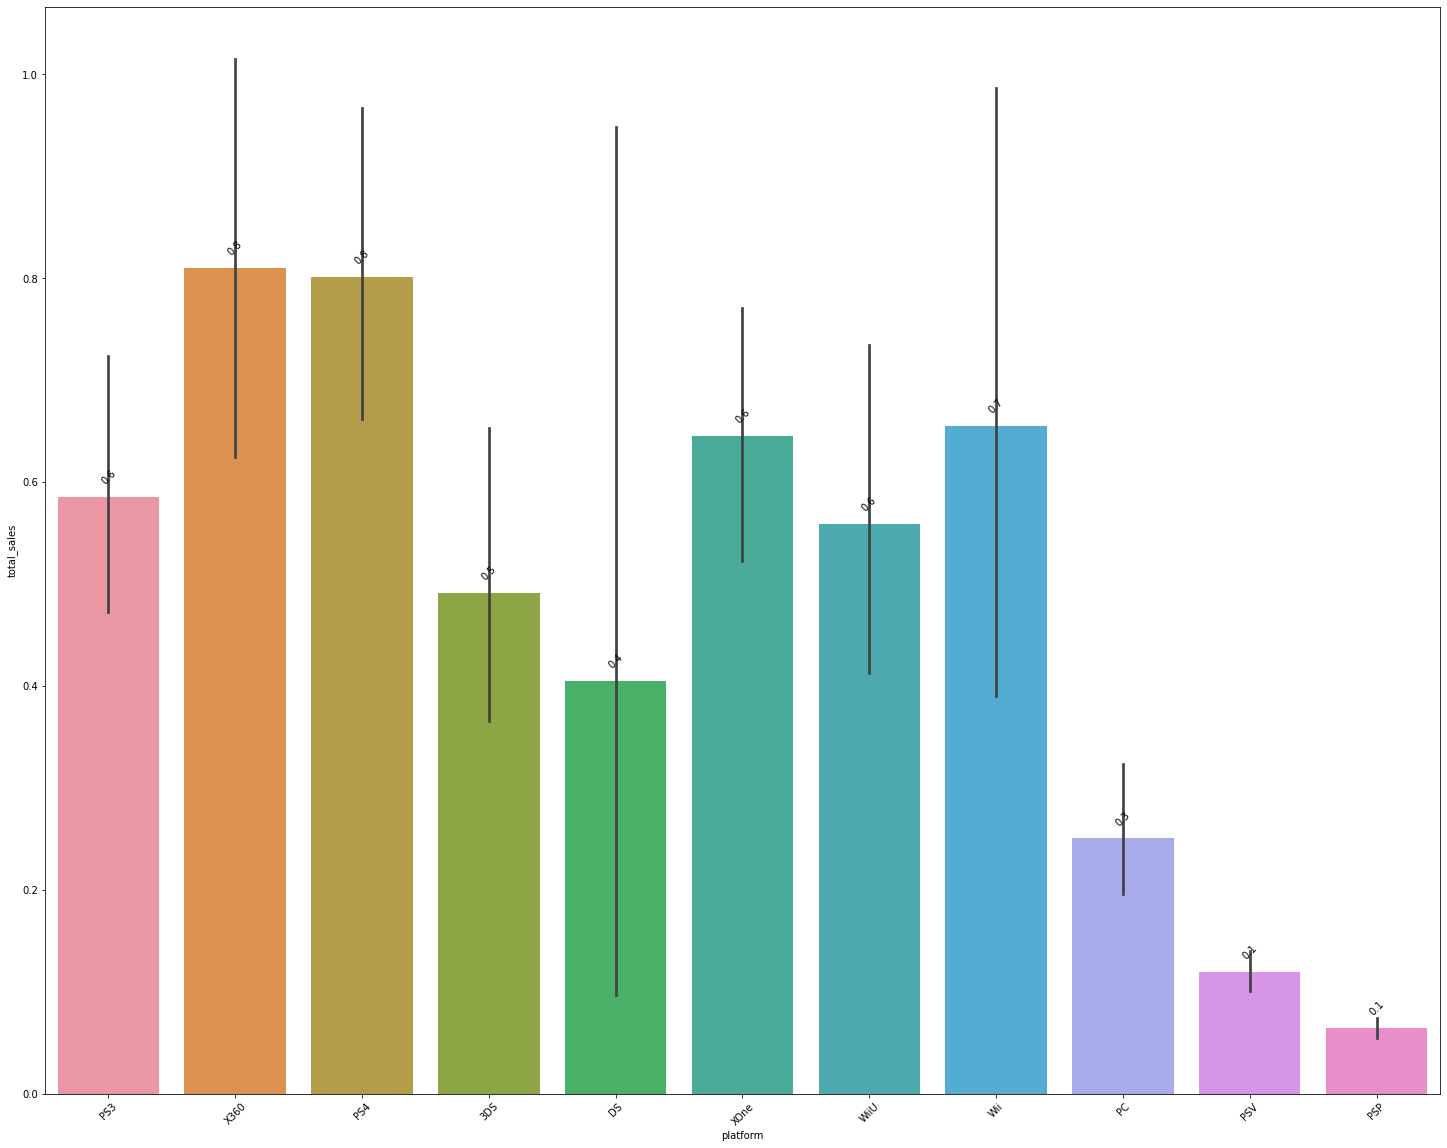

In [134]:
plt.figure(figsize=(25,20)) # contoh kode saya perbesar figure size nya
df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
splot = sns.barplot(data=df_final, x='platform', y='total_sales') # assign plot kedalam object
#contoh kode anotasi mulai
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

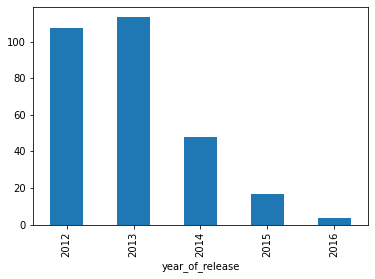

In [135]:
sales_per_platform(df_final, 'PS3')

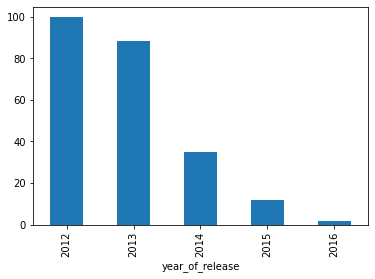

In [136]:
sales_per_platform(df_final, 'X360')

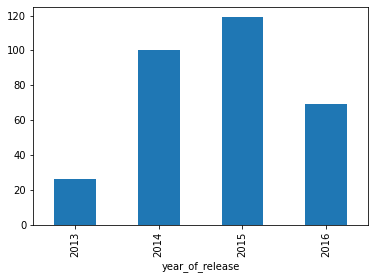

In [137]:
sales_per_platform(df_final, 'PS4')

In [138]:
top_platforms = df_final[df_final['platform'].isin(['PS3', 'X360', 'PS4'])]
top_platforms.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8167,DiRT Showdown,PS3,2012,Racing,0.02,0.12,0.00,0.03,75.0,6.3,E10+,0.17
749,Madden NFL 15,PS4,2014,Sports,1.54,0.25,0.00,0.40,81.0,6.1,E,2.19
7331,Transformer: Rise of the Dark Spark,PS4,2014,Action,0.07,0.10,0.01,0.03,NaN,NaN,Not Rated,0.21
13364,Adventure Time: Explore the Dungeon Because I ...,PS3,2013,Action,0.02,0.01,0.00,0.01,NaN,NaN,Not Rated,0.04
2383,Sleeping Dogs,X360,2012,Action,0.38,0.40,0.01,0.08,80.0,7.9,M,0.87


* PS3, X360, and PS4 are the platforms with the highest sales volume.
* PS4 can be considered a growing platform.
* PS3 and X360 have experienced declines in the last 5 years.

# Boxplot of global sales for all games by platform
Through the boxplot, we can examine whether there are significant differences in sales and how the average sales vary across different platforms.

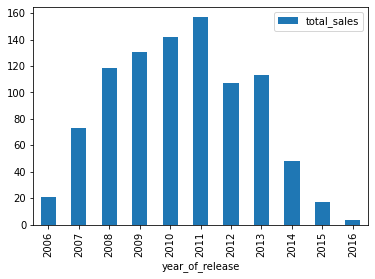

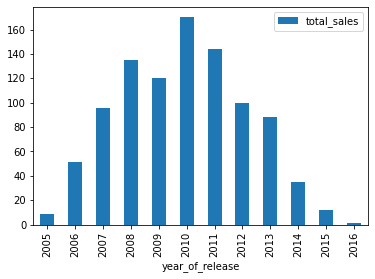

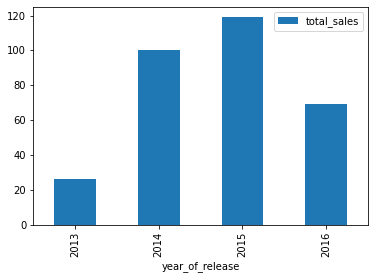

In [139]:
for platform in ['PS3', 'X360', 'PS4']:
    df_temp = df.loc[df['platform']==platform]
    plot_df_temp = df_temp.groupby('year_of_release')['total_sales'].agg('sum').reset_index().sort_values(by='year_of_release')
    plot_df_temp.plot(kind='bar', x='year_of_release', y='total_sales')

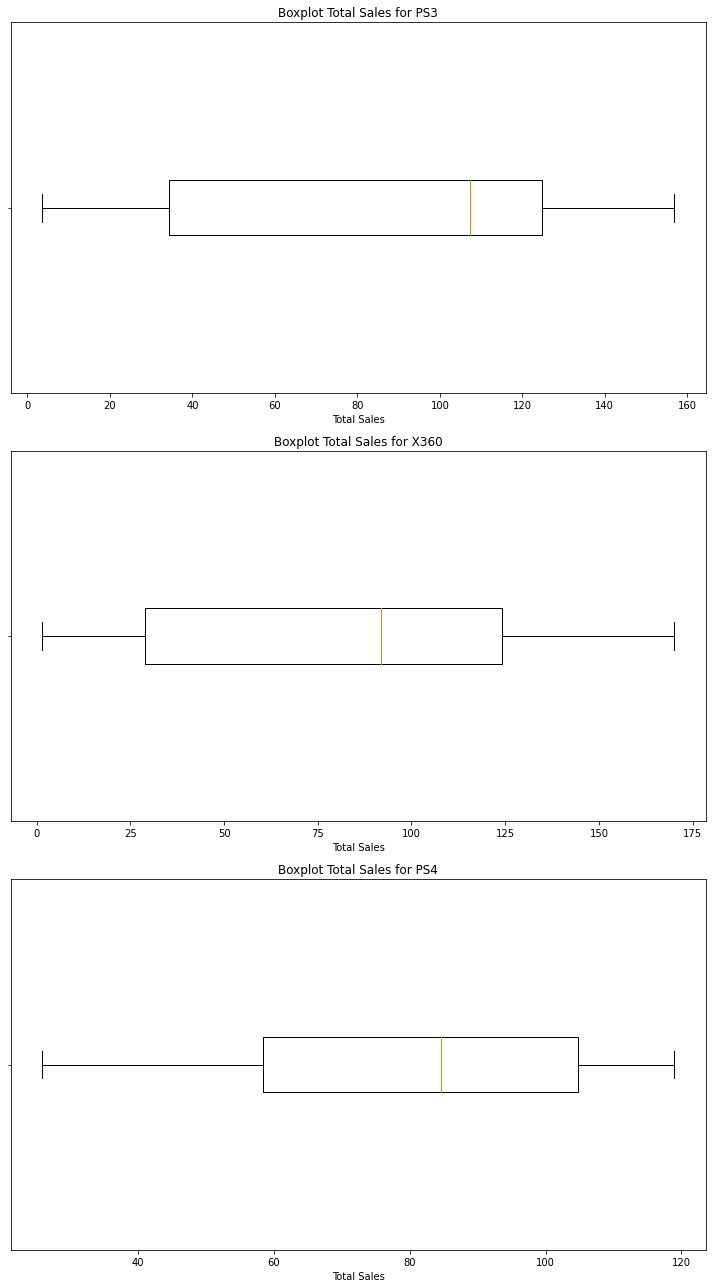

In [140]:
platforms = ['PS3', 'X360', 'PS4']
fig, axes = plt.subplots(nrows=len(platforms), ncols=1, figsize=(10, 6 * len(platforms)))

# Loop melalui setiap platform
for i, platform in enumerate(platforms):
    df_temp = df.loc[df['platform'] == platform]
    plot_df_temp = df_temp.groupby('year_of_release')['total_sales'].agg('sum').reset_index().sort_values(by='year_of_release')
    
    # Membuat boxplot
    axes[i].boxplot(plot_df_temp['total_sales'], vert=False)
    axes[i].set_title(f'Boxplot Total Sales for {platform}')
    axes[i].set_xlabel('Total Sales')
    axes[i].set_yticklabels([])

plt.tight_layout()
plt.show()

In [141]:
top_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'median'])

,mean,median
,total_sales,total_sales
platform,,
PS3,0.585781,0.20
PS4,0.801378,0.20
X360,0.810068,0.31


* PS3 and X360 exhibit similar sales patterns, while PS4 shows a relatively insignificant decline in sales towards 2016.
* X360 has the highest average sales compared to PS2 and PS4.

# Reviewing user and professional reviews on the impact of sales on the selected top platforms.

In [142]:
X_360 = df_final[df_final['platform']=='X360']
X_360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Not Rated,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16460,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16491,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,Not Rated,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

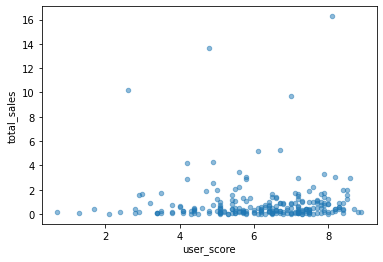

In [143]:
X_360.plot.scatter(y='total_sales', x='user_score', alpha=0.5)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

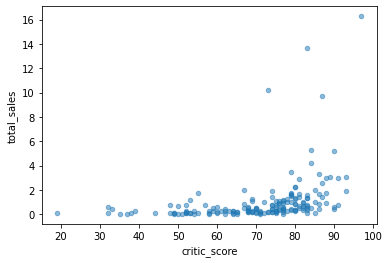

In [144]:
X_360.plot.scatter(y='total_sales', x='critic_score', alpha=0.5)

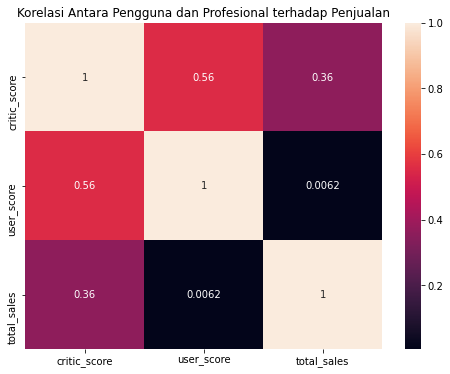

In [145]:
X360_corr = df_final.loc[df_final['platform']=='X360', ['critic_score', 'user_score', 'total_sales']]

# Kalau valuenya positif, artinya hubungan antar variable selaras
# Kalau valuenya negatif, artinya hubungan antar variable berlawanan
# Mendekati 0 (Tidak ada korelasi)
# 0.01 - 0.33 (Lemah)
# 0.33 - 0.66 (Medium)
# 0.66 - 1.00 (Tinggi)
plt.figure(figsize=(8, 6))
plt.title('Korelasi Antara Pengguna dan Profesional terhadap Penjualan')
sns.heatmap(X360_corr.corr(), annot=True)
plt.show()

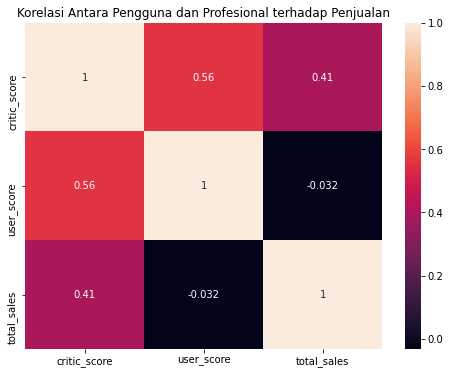

In [146]:
PS4_corr = df_final.loc[df_final['platform']=='PS4', ['critic_score', 'user_score', 'total_sales']]

# Kalau valuenya positif, artinya hubungan antar variable selaras
# Kalau valuenya negatif, artinya hubungan antar variable berlawanan
# Mendekati 0 (Tidak ada korelasi)
# 0.01 - 0.33 (Lemah)
# 0.33 - 0.66 (Medium)
# 0.66 - 1.00 (Tinggi)
plt.figure(figsize=(8, 6))
plt.title('Korelasi Antara Pengguna dan Profesional terhadap Penjualan')
sns.heatmap(PS4_corr.corr(), annot=True)
plt.show()

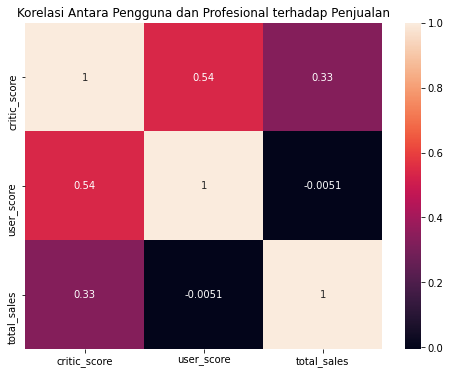

In [147]:
PS3_corr = df_final.loc[df_final['platform']=='PS3', ['critic_score', 'user_score', 'total_sales']]

# Kalau valuenya positif, artinya hubungan antar variable selaras
# Kalau valuenya negatif, artinya hubungan antar variable berlawanan
# Mendekati 0 (Tidak ada korelasi)
# 0.01 - 0.33 (Lemah)
# 0.33 - 0.66 (Medium)
# 0.66 - 1.00 (Tinggi)
plt.figure(figsize=(8, 6))
plt.title('Korelasi Antara Pengguna dan Profesional terhadap Penjualan')
sns.heatmap(PS3_corr.corr(), annot=True)
plt.show()

From the visual of the sales impact from user and professional reviews, the correlation between them is relatively weak on popular platforms.

# Sales of the same game on other platforms

In [148]:
PS3_df_final = df_final.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "PS3" & critic_score > 0 & user_score > 0').reset_index()
PS3_df_final.head(10)

/tmp/ipykernel_34/4093207165.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PS3_df_final = df_final.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(


,platform,name,total_sales,critic_score,user_score
0,PS3,Tales of Xillia 2,0.84,71.0,7.9
1,PS3,2014 FIFA World Cup Brazil,0.61,73.0,4.3
2,PS3,Aliens: Colonial Marines,0.60,43.0,3.6
3,PS3,Anarchy Reigns,0.21,71.0,8.2
4,PS3,Angry Birds Star Wars,0.29,49.0,3.6
5,PS3,Angry Birds Trilogy,0.17,66.0,3.7
6,PS3,Aquapazza: Aquaplus Dream Match,0.11,75.0,7.8
7,PS3,Ar Nosurge: Ode to an Unborn Star,0.16,67.0,7.8
8,PS3,Armored Core V,0.39,65.0,7.3
9,PS3,Armored Core: Verdict Day,0.12,66.0,7.4


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

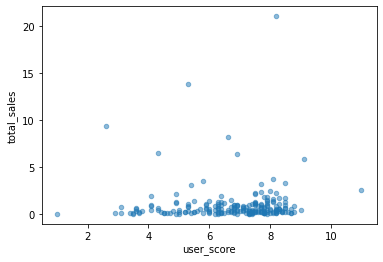

In [149]:
PS3_df_final.plot.scatter(y='total_sales', x='user_score', alpha=0.5)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

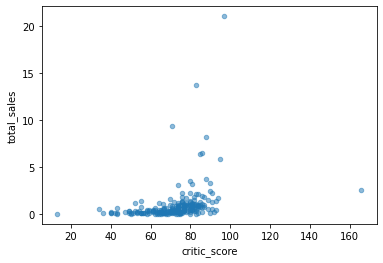

In [150]:
PS3_df_final.plot.scatter(y='total_sales', x='critic_score', alpha=0.5)

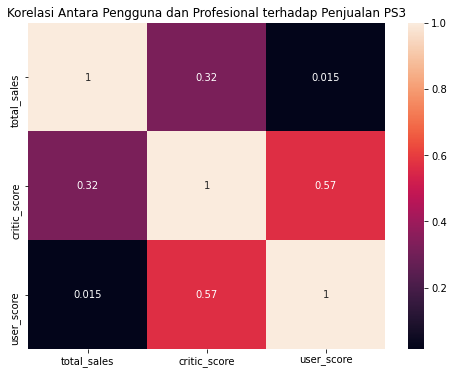

In [151]:
# Kalau valuenya positif, artinya hubungan antar variable selaras
# Kalau valuenya negatif, artinya hubungan antar variable berlawanan
# Mendekati 0 (Tidak ada korelasi)
# 0.01 - 0.33 (Lemah)
# 0.33 - 0.66 (Medium)
# 0.66 - 1.00 (Tinggi)
plt.figure(figsize=(8, 6))
plt.title('Korelasi Antara Pengguna dan Profesional terhadap Penjualan PS3')
sns.heatmap(PS3_df_final.corr(), annot=True)
plt.show()

Platform X360:

* Correlation between sales and critic_score: 0.36
* Correlation between sales and user_score: 0.0062

Platform PS3:

* Correlation between sales and critic_score: 0.32
* Correlation between sales and user_score: 0.015

Conclusion

Both platforms exhibit a positive correlation between sales and critic_score as well as user_score, with a slightly higher correlation observed between sales and critic_score compared to sales and user_score. However, the correlation between sales and both critic_score and user_score on both platforms is weak, suggesting that their influence on sales is not significant.

# General Distribution of Games by Genre

<AxesSubplot:xlabel='genre'>

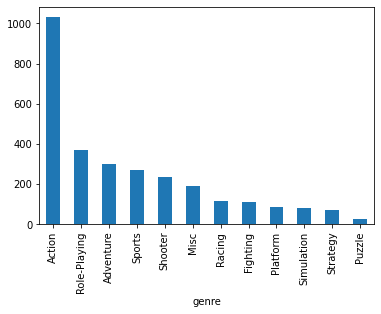

In [152]:
df_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='genre'>

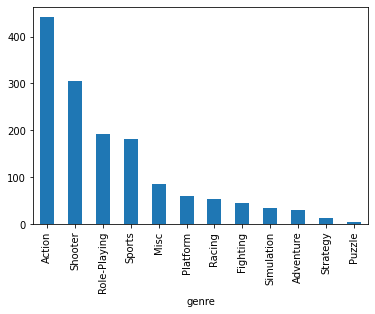

In [153]:
df_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

The action genre exhibits the highest demand trend, while puzzle is comparatively less popular. This trend is also reflected in sales, with action genre having the highest number of sales among all genres.

# User profiling for each region
Top five platforms based on region

In [154]:
df_final

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not Rated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Not Rated,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01


In [155]:
def platform_sales_area (area):
    df_profiling = df_final.groupby('platform')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_profiling['market_share'] = (df_profiling[area]/df_profiling[area].sum())*100
    return df_profiling.head(5)

In [156]:
# kita lihat na
na = platform_sales_area('na_sales')
na

,platform,na_sales,market_share
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189


In [157]:
# kita lihat eu
eu = platform_sales_area('eu_sales')
eu

,platform,eu_sales,market_share
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243


In [158]:
# kita lihat jp
jp = platform_sales_area('jp_sales')
jp

,platform,jp_sales,market_share
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634


In [159]:
# kita lihat other
other = platform_sales_area('other_sales')
other

,platform,other_sales,market_share
4,PS4,48.35,30.961834
3,PS3,43.26,27.702357
9,X360,20.40,13.063525
10,XOne,14.27,9.138064
0,3DS,8.87,5.680072


We find the distribution of market share variation in each region:

* NA: X360, PS4, PS3, XOne, 3DS
* EU: PS4, PS3, X360, XOne, 3DS
* JP: 3DS, PS3, PSV, PS4, WiiU
* Other: PS4, PS3, X360, XOne, 3DS

Top five platforms by genre

In [160]:
def platform_genre_area (area):
    df_profiling = df_final.groupby('genre')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_profiling['market_share'] = (df_profiling[area]/df_profiling[area].sum())*100
    return df_profiling.head(5)

In [161]:
# kita lihat na
na = platform_genre_area('na_sales')
na

,genre,na_sales,market_share
0,Action,177.84,30.092898
8,Shooter,144.77,24.497013
10,Sports,81.53,13.795963
7,Role-Playing,64.00,10.829653
3,Misc,38.19,6.462257


In [162]:
# kita lihat eu
eu = platform_genre_area('eu_sales')
eu

,genre,eu_sales,market_share
0,Action,159.34,31.439170
8,Shooter,113.47,22.388619
10,Sports,69.09,13.632059
7,Role-Playing,48.53,9.575392
6,Racing,27.29,5.384555


In [163]:
# kita lihat jp
jp = platform_genre_area('jp_sales')
jp

,genre,jp_sales,market_share
7,Role-Playing,65.44,33.980683
0,Action,52.80,27.417177
3,Misc,12.86,6.677744
9,Simulation,10.41,5.405546
2,Fighting,9.44,4.901859


In [164]:
# kita lihat other
other = platform_genre_area('other_sales')
other

,genre,other_sales,market_share
0,Action,51.14,32.748463
8,Shooter,37.26,23.860143
10,Sports,22.44,14.369877
7,Role-Playing,14.83,9.496670
3,Misc,7.67,4.911629


We found that among the top 5 genres, the genre distribution differs in Japan compared to the NA, EU, and other regions. In Japan, the most prevalent genre is role-playing, while in regions other than Japan, the most prevalent genre is action.

Based on ESRB

In [165]:
def platform_esrb_area (area):
    df_profiling = df_final.groupby('rating')[area].sum().reset_index().sort_values(by=area, ascending=False)
    df_profiling['market_share'] = (df_profiling[area]/df_profiling[area].sum())*100
    return df_profiling.head(5)

In [166]:
# kita lihat na
na = platform_esrb_area('na_sales')
na

,rating,na_sales,market_share
2,M,231.57,39.184730
0,E,114.37,19.352928
3,Not Rated,103.31,17.481429
1,E10+,75.70,12.809449
4,T,66.02,11.171464


In [167]:
# kita lihat eu
eu = platform_esrb_area('eu_sales')
eu

,rating,eu_sales,market_share
2,M,193.96,38.269997
0,E,113.03,22.301803
3,Not Rated,91.50,18.053747
1,E10+,55.37,10.924983
4,T,52.96,10.449469


In [168]:
# kita lihat jp
jp = platform_esrb_area('jp_sales')
jp

,rating,jp_sales,market_share
3,Not Rated,108.84,56.516772
0,E,28.33,14.710770
4,T,26.02,13.511268
2,M,21.20,11.008412
1,E10+,8.19,4.252778


In [169]:
# kita lihat other
other = platform_esrb_area('other_sales')
other

,rating,other_sales,market_share
2,M,63.38,40.586578
0,E,31.44,20.133197
3,Not Rated,27.17,17.398822
4,T,17.94,11.488217
1,E10+,16.23,10.393186


We found that based on the ESRB ratings:

* NA and EU: M, E, Not Rated, E10+, and T
* JP: Not Rated, E, T, M, E10+
* Other: M, E, Not Rated, T, and E10+

Ratings do not significantly impact sales in each region.

# Hypothesis Testing
**Platform Hypothesis Testing**

* H0 = The average user ratings of Xbox One and PC platforms are the same.
* H1 = The average user ratings of Xbox One and PC platforms are different.

In [170]:
df_rating = df_final.groupby('rating')['user_score'].agg(['mean', 'var'])
df_rating

,mean,var
rating,,
E,5.973591,3.304449
E10+,6.615414,2.057535
M,6.735438,2.297435
Not Rated,7.218000,1.262731
T,7.026098,1.800068


In [171]:
sample_1 = df_final[df_final['platform']=='XOne'].dropna()['user_score']
sample_1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16322    7.5
16392    6.3
16597    6.0
16630    8.2
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [172]:
sample_2 = df_final[df_final['platform']=='PC'].dropna()['user_score']
sample_2

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16453    7.1
16463    6.8
16509    7.9
16584    7.9
16692    7.6
Name: user_score, Length: 197, dtype: float64

In [173]:
(sample_1.mean(), sample_2.mean())

(6.538181818181818, 6.4543147208121825)

In [174]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=6.256264688905128, pvalue=0.012818935705571605)

In [175]:
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
results.pvalue

0.5926561176517491

In [176]:
# uji hipotesis
if (results.pvalue < alpha):
    print("H0 ditolak")
else:
    print("H0 diterima")

H0 diterima


**Genre Hypothesis Testing**

* H0 = The average user ratings of Action and Sports genres are the same.
* H1 = The average user ratings of Action and Sports genres are different.

In [177]:
sample_x = df_final[df_final['genre']=='Action'].dropna()['user_score']
sample_x

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16584    7.9
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 432, dtype: float64

In [178]:
sample_y = df_final[df_final['genre']=='Sports'].dropna()['user_score']
sample_y

77       4.3
94       5.0
126      4.3
143      5.7
271      4.2
        ... 
15407    3.7
15839    6.0
16120    6.3
16146    6.9
16230    5.5
Name: user_score, Length: 141, dtype: float64

In [179]:
(sample_x.mean(), sample_y.mean())

(6.899305555555555, 5.819858156028368)

In [180]:
st.levene(sample_x, sample_y)

LeveneResult(statistic=1.2201144904254275, pvalue=0.2698034213167573)

In [181]:
alpha = 0.05
results = st.ttest_ind(sample_x, sample_y, equal_var=False)
results.pvalue

5.858072645452818e-14

In [182]:
# uji hipotesis
if (results.pvalue < alpha):
    print("H0 ditolak")
else:
    print("H0 diterima")

H0 ditolak


From the hypothesis testing, we found that:

* The average user ratings of Xbox One and PC platforms are the same.

The p-value is greater than the predetermined significance level (alpha 0.05), thus accepting the null hypothesis. This means we do not have sufficient evidence to conclude that the average user ratings of Xbox One and PC platforms are different.

* The average user ratings of Action and Sports genres are different.
The p-value is smaller than the predetermined significance level (alpha 0.05), thus rejecting the null hypothesis. This means we have sufficient evidence to conclude that the average user ratings of Action and Sports genres are different.

# Conclusion
1. Number of games released in different years: From the dataset of yearly releases, it is observed that there were many game releases throughout 1980-2015, with the highest number of releases occurring in 2010.

2. Reviewing the variation in sales from one platform to another: The platform with the highest sales is PS2, with the highest sales occurring in 2008 and 2009.

3. Determining the time period for data collection:

Reviewing yearly sales through the top 3 platforms: PS2, X360, and PS3

- On average, it takes about 5 years for their popularity trend.
- PS2 had the highest sales in 2004.
- X360 had the highest sales in 2010.
- PS3 achieved its highest sales in 2011.

4. Based on the trend of the top 3 platforms above, the data for prediction in 2017 will include the last 5 years of data, starting from 2012.

5. In addition to identifying the platform with the highest sales, it is also necessary to find platforms that are growing and declining, and then select platforms that have the potential to bring profit. It can be observed that:

- PS3, X360, and PS4 are the platforms with the highest sales.
- PS4 can be considered a growing platform.
- PS3 and X360 have experienced declines in the last 5 years.

6. Through boxplot, we can examine if there are significant differences in sales and the average sales across various platforms. From the global sales based on 3 platforms:

- PS3 and X360 have similar sales trends, while PS4's sales decline towards 2016 is not significant.
- X360 has the highest average sales compared to PS2 and PS4.

7. Reviewing user and professional reviews on the influence of sales on the selected top platforms: From the visualization of the influence of sales from user and professional reviews, the correlation between them is relatively weak on popular platforms.

8. The same game on other platforms has a similar sales trend.

9. General distribution of games by genre: The action genre is the most popular trend, while puzzle genre is less favored. In terms of sales, the trend is similar to the most favored genres, with action genre having the highest number of sales.

10. Profiling users in each region:

- Among the top 5 genres, for Japan, the most favored genre is different from NA, EU, and other regions. In Japan, the most favored genre is role-playing, while in other regions, the most favored genre is action.

Based on ESRB:

- NA and EU: M, E, Not Rated, E10+, and T
- JP: Not Rated, E, T, M, E10+
- Other: M, E, Not Rated, T, and E10+
- Ratings do not significantly affect sales in each region.

From our hypothesis testing, we found:

- The average user ratings of Xbox One and PC platforms are the same. The p-value is greater than the predetermined significance level (alpha 0.05), thus accepting the null hypothesis. This means we do not have sufficient evidence to conclude that the average user ratings of Xbox One and PC platforms are different.
- The average user ratings of Action and Sports genres are different. The p-value is smaller than the predetermined significance level (alpha 0.05), thus rejecting the null hypothesis. This means we have sufficient evidence to conclude that the average user ratings of Action and Sports genres are different.

**Recommendations**
1. PS4 is a growing platform and has the potential to bring profit. It needs special attention in the sales strategy for 2017.
2. PS3 and X360 have experienced declines in the last 5 years. It may be worth considering whether it is still worthwhile to invest resources in these platforms.
3. PS2, despite once having the highest sales, may no longer be relevant to the sales strategy in 2017.